### В связи с тем, что у меня не получилось загрузить полностью всю базу данных на гугл диск, я с места хранения на ноуте извлекла из всех аудио значения и поместила их в all_data.pickle и all_label.pickle, и сохранила их на гугл диск для дальнейшей работы. Ход действий смотреть в файле laba_1_a_e_a_work_audio.ipynb


In [0]:
import librosa
import numpy as np
import pickle
import matplotlib.pyplot as plt
import librosa.display

from google.colab import drive
from google.colab import drive
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score

drive.mount('/content/gdrive')

!ls -la "/content/gdrive/My Drive/acoustic_event_analysis"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
total 8063017
-rw------- 1 root root  622477851 Mar  4 14:12  all_data_mel.pickle
-rw------- 1 root root 1238421886 Feb 27 14:57  all_data.pickle
-rw------- 1 root root      11384 Feb 27 14:12  all_label.pickle
-rw------- 1 root root   94188175 Mar 12 10:45  data_test_n_fft_1024_hop_length_1024.pickle
-rw------- 1 root root  187421525 Mar  4 14:12  data_test.pickle
-rw------- 1 root root  218612334 Mar 12 10:45  data_train_n_fft_1024_hop_length_1024.pickle
-rw------- 1 root root  435055710 Mar  4 14:12  data_train.pickle
-rw------- 1 root root       3420 Mar  4 14:12  label_test.pickle
-rw------- 1 root root       7970 Mar  4 14:12  label_train.pickle
-rw------- 1 root root  818934758 Mar 10 18:13  norm_test_data.pickle
-rw------- 1 root root  818934758 Mar  5 07:26  norm_test_data_v3.pickle
-rw------- 1 root root 1910688484 Mar 10 18:14  norm_train_data.pi

#### Подгружаем сохраненные файлы для извлечения признаков

In [0]:
# путь к файлам
path = "/content/gdrive/My Drive/acoustic_event_analysis/"

In [0]:
# считываем дынные из файла
with open(path + 'all_data.pickle', 'rb') as f:
  all_data = pickle.load(f)

In [0]:
# выводим количество примеров
print(len(all_data))

5683


Визуализация Mel-frequency spectrogram двух аудио файлов при изменении параметров

In [0]:
# находим feature.melspectrogram (параметры по умолчанию n_fft = 2048 , hop_length = 512) для каждого примера
all_data_mel = []
for i in all_data[5682:]:
  mel_2 = librosa.feature.melspectrogram(y=i, sr=8000, n_fft = 2048 , hop_length=1024)
  # all_data_mel.append(mel)
# print(all_data_mel)

In [0]:
mel_2.shape

(128, 53)

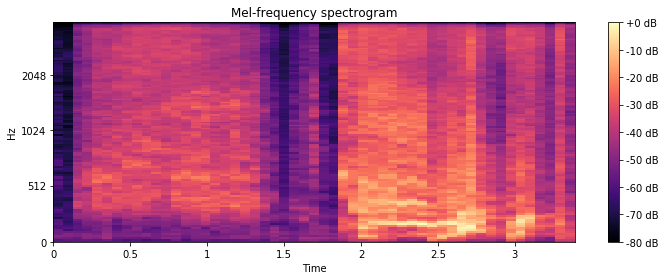

In [0]:
# mel = librosa.feature.melspectrogram(y=i, sr=8000, n_fft = 2048 , hop_length=1024)
plt.figure(figsize=(10, 4))
mel_2_dB = librosa.power_to_db(mel_2, ref=np.max)
librosa.display.specshow(mel_2_dB, x_axis='time',
                         y_axis='mel', sr=8000,
                          fmax=8000/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

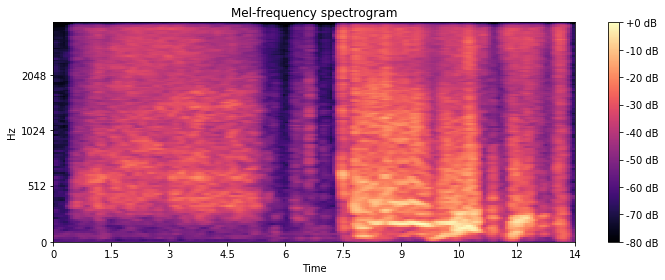

In [0]:
# mel = librosa.feature.melspectrogram(y=i, sr=8000, n_fft = 2048 , hop_length=256)
plt.figure(figsize=(10, 4))
mel_2_dB = librosa.power_to_db(mel_2, ref=np.max)
librosa.display.specshow(mel_2_dB, x_axis='time',
                         y_axis='mel', sr=8000,
                          fmax=8000/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

In [0]:
# находим feature.melspectrogram (параметры по умолчанию n_fft = 2048 , hop_length = 512) для каждого примера
all_data_mel = []
for i in all_data[:1]:
  mel = librosa.feature.melspectrogram(y=i, sr=8000, n_fft = 2048 , hop_length=512)
  # all_data_mel.append(mel)
# print(all_data_mel)

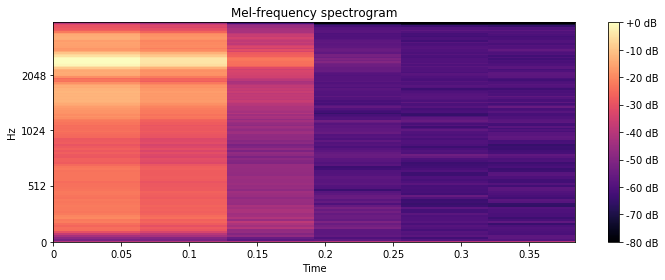

In [0]:
# mel = librosa.feature.melspectrogram(y=i, sr=8000, n_fft = 2048 , hop_length=512)
plt.figure(figsize=(10, 4))
mel_dB = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel_dB, x_axis='time',
                         y_axis='mel', sr=8000,
                          fmax=8000/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

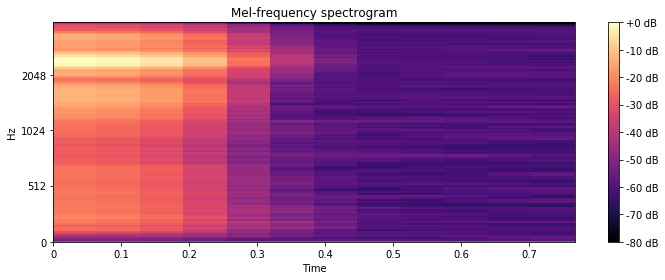

In [0]:
# mel = librosa.feature.melspectrogram(y=i, sr=8000, n_fft = 2048 , hop_length=256)
plt.figure(figsize=(10, 4))
mel_dB = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel_dB, x_axis='time',
                         y_axis='mel', sr=8000,
                          fmax=8000/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

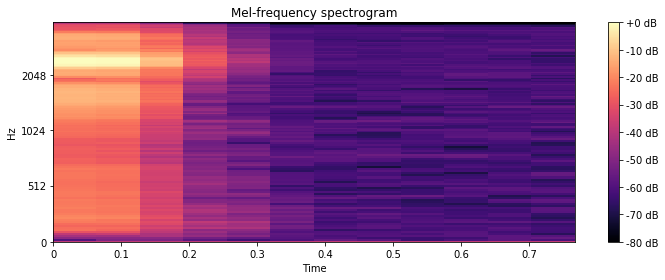

In [0]:
# mel = librosa.feature.melspectrogram(y=i, sr=8000, n_fft = 1024 , hop_length=256)
plt.figure(figsize=(10, 4))
mel_dB = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel_dB, x_axis='time',
                         y_axis='mel', sr=8000,
                          fmax=8000/2)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.tight_layout()
plt.show()

Спектрограммы отобразила, чтобы визуально посмотреть разницу при различных параметрах melspectrogram


#### Тест 1. Параметры librosa.feature.melspectrogram: sr=8000, n_fft=1024, hop_length=1024

In [0]:
all_data_mel = []
for i in all_data:
  mel = librosa.feature.melspectrogram(y=i, sr=8000, n_fft = 1024 , hop_length=1024)
  all_data_mel.append(mel)
# print(all_data_mel)

##### Подгружаем сохраненные метки

In [0]:
# считываем метки из файла
with open(path + 'all_label.pickle', 'rb') as f:
  all_labels = pickle.load(f)

In [0]:
### Находим максимальное количество столбцов в массиве
max_column = 0
for i in all_data_mel:
  if max_column <= i.shape[1]:
    max_column = i.shape[1]

##### Разбиваем на test и train с соблюдением пропорций

In [0]:
# для этого необходимо создать словарь, где ключь - это метки, значения - это список массивов признаков для каждой метки
all_dict = {}
for i in range(len(all_data_mel)):
    if all_labels[i] in all_dict:
        all_dict.update({all_labels[i]: all_dict[all_labels[i]] + [all_data_mel[i]]})
    else:
        all_dict.update({all_labels[i]: [all_data_mel[i]]}) 

In [0]:
for k_new_dict, v_new_dict in all_dict.items():
    print(k_new_dict, len(v_new_dict))

0 80
1 171
2 81
3 85
4 173
5 188
6 66
7 176
8 174
9 162
10 183
11 184
12 153
13 181
14 117
15 57
16 191
17 180
18 161
19 163
20 179
21 147
22 83
23 194
24 99
25 162
26 186
27 180
28 195
29 113
30 94
31 90
32 187
33 135
34 180
35 167
36 88
37 80
38 64
39 56
40 78


In [0]:
# делим данные на test(30%), train(70%)
train_data = []
train_label = []
test_data = []
test_label = []

for k_new_dict, v_new_dict in all_dict.items():
  count = 0
  for i in v_new_dict:
    count += 1
    if count <= round(len(v_new_dict)*0.7):
      train_data.append(i) # добавляем в словарь массив признаков
      train_label.append(k_new_dict) # добавляем в словарь метку массива признаков
    else:
      test_data.append(i) # добавляем в словарь массив признаков
      test_label.append(k_new_dict)  # добавляем в словарь метку массива признаков

In [0]:
print(len(train_data), len(train_label))
print(len(test_data), len(test_label))

3978 3978
1705 1705


In [0]:
# выводим количество массивов признаков на метку (класс) для train
count_train=[0 for x in range(41)]

for i in range(0, len(train_label)):
      count_train[train_label[i]] += 1
print(count_train)

[56, 120, 57, 59, 121, 132, 46, 123, 122, 113, 128, 129, 107, 127, 82, 40, 134, 126, 113, 114, 125, 103, 58, 136, 69, 113, 130, 126, 136, 79, 66, 63, 131, 94, 126, 117, 62, 56, 45, 39, 55]


In [0]:
# выводим количество массивов признаков на метку (класс) для test
count_test=[0 for x in range(41)]

for i in range(0, len(test_label)):

      count_test[test_label[i]] += 1
print(count_test)

[24, 51, 24, 26, 52, 56, 20, 53, 52, 49, 55, 55, 46, 54, 35, 17, 57, 54, 48, 49, 54, 44, 25, 58, 30, 49, 56, 54, 59, 34, 28, 27, 56, 41, 54, 50, 26, 24, 19, 17, 23]


In [0]:
# сохранаем train_data
with open(path + 'data_train_n_fft_1024_hop_length_1024.pickle', 'wb') as f_data_train:
    pickle.dump(train_data, f_data_train)

In [0]:
# сохранаем test_data
with open(path + 'data_test_n_fft_1024_hop_length_1024.pickle', 'wb') as f_data_test:
    pickle.dump(test_data, f_data_test)

##### Заполняем массивы нулями до одной длины

In [0]:
norm_train_data = []
for ss in train_data:
  new_matrix = np.zeros((128, max_column)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_train_data.append(new_matrix.ravel())

In [0]:
norm_test_data = []
for ss in test_data:
  new_matrix = np.zeros((128, max_column))
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_test_data.append(new_matrix.ravel())

##### Результаты по тест 1

In [0]:
best_params_ = {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
svm = SVC(kernel=best_params_['kernel'], C=best_params_['C'], gamma=best_params_['gamma'])
svm.fit(norm_train_data, train_label)
prediction_test = svm.predict(norm_test_data)
prediction_train = svm.predict(norm_train_data)
# f1 = f1_score(label_test, prediction, average= 'micro')

In [0]:
print(classification_report(test_label, prediction_test, digits = 4))

              precision    recall  f1-score   support

           0     0.7000    0.5833    0.6364        24
           1     0.1176    0.0392    0.0588        51
           2     0.0909    0.1667    0.1176        24
           3     0.1000    0.0769    0.0870        26
           4     0.5750    0.4423    0.5000        52
           5     0.2609    0.1071    0.1519        56
           6     0.0909    0.1000    0.0952        20
           7     0.1214    0.3208    0.1762        53
           8     0.0938    0.0577    0.0714        52
           9     0.2381    0.1020    0.1429        49
          10     0.2432    0.6545    0.3547        55
          11     0.1765    0.1091    0.1348        55
          12     0.0933    0.1522    0.1157        46
          13     0.6452    0.7407    0.6897        54
          14     0.9375    0.4286    0.5882        35
          15     0.3077    0.2353    0.2667        17
          16     0.4762    0.3509    0.4040        57
          17     0.1923    

In [0]:
print(classification_report(train_label, prediction_train, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.8571    0.9231        56
           1     1.0000    0.9750    0.9873       120
           2     1.0000    1.0000    1.0000        57
           3     1.0000    1.0000    1.0000        59
           4     1.0000    0.9917    0.9959       121
           5     1.0000    0.9621    0.9807       132
           6     1.0000    0.9348    0.9663        46
           7     1.0000    1.0000    1.0000       123
           8     1.0000    1.0000    1.0000       122
           9     1.0000    0.9469    0.9727       113
          10     1.0000    1.0000    1.0000       128
          11     1.0000    0.9767    0.9882       129
          12     1.0000    1.0000    1.0000       107
          13     1.0000    1.0000    1.0000       127
          14     1.0000    0.9756    0.9877        82
          15     1.0000    0.9750    0.9873        40
          16     1.0000    1.0000    1.0000       134
          17     1.0000    

In [0]:
# сохраняем предсказания для test и train v3 для дальнейшей работы

np.save(path + 'prediction_test_v1_n_fft_1024_hop_length_1024', prediction_test)
np.save(path + 'prediction_train_v1_n_fft_1024_hop_length_1024', prediction_train)

#### Тест 2. Параметры librosa.feature.melspectrogram: sr=8000, n_fft=2048, hop_length=1024

In [0]:
all_data_mel = []
for i in all_data:
  mel = librosa.feature.melspectrogram(y=i, sr=8000, n_fft=2048, hop_length=1024)
  all_data_mel.append(mel)
# print(all_data_mel)

In [0]:
# Находим максимальное количество столбцов в массиве
max_column = 0
for i in all_data_mel:
  if max_column <= i.shape[1]:
    max_column = i.shape[1]

In [0]:
all_dict = {}
for i in range(len(all_data_mel)):
    if all_labels[i] in all_dict:
        all_dict.update({all_labels[i]: all_dict[all_labels[i]] + [all_data_mel[i]]})
    else:
        all_dict.update({all_labels[i]: [all_data_mel[i]]}) 

In [0]:
# делим данные на test(30%), train(70%)
train_data = []
train_label = []
test_data = []
test_label = []

for k_new_dict, v_new_dict in all_dict.items():
  count = 0
  for i in v_new_dict:
    count += 1
    if count <= round(len(v_new_dict)*0.7):
      train_data.append(i) # добавляем в словарь массив признаков
      train_label.append(k_new_dict) # добавляем в словарь метку массива признаков
    else:
      test_data.append(i) # добавляем в словарь массив признаков
      test_label.append(k_new_dict)  # добавляем в словарь метку массива признаков

In [0]:
norm_train_data = []
for ss in train_data:
  new_matrix = np.zeros((128, max_column)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_train_data.append(new_matrix.ravel())

In [0]:
norm_test_data = []
for ss in test_data:
  new_matrix = np.zeros((128, max_column))
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_test_data.append(new_matrix.ravel())

##### Результаты по тест 2

In [0]:
best_params_ = {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
svm = SVC(kernel=best_params_['kernel'], C=best_params_['C'], gamma=best_params_['gamma'])
svm.fit(norm_train_data, train_label)
prediction_test = svm.predict(norm_test_data)
prediction_train = svm.predict(norm_train_data)
# f1 = f1_score(label_test, prediction, average= 'micro')

In [0]:
print(classification_report(test_label, prediction_test, digits = 4))

              precision    recall  f1-score   support

           0     0.6296    0.7083    0.6667        24
           1     0.1818    0.0784    0.1096        51
           2     0.1091    0.2500    0.1519        24
           3     0.0000    0.0000    0.0000        26
           4     0.5238    0.4231    0.4681        52
           5     0.2593    0.1250    0.1687        56
           6     0.1154    0.1500    0.1304        20
           7     0.1308    0.3208    0.1858        53
           8     0.1190    0.0962    0.1064        52
           9     0.2069    0.1224    0.1538        49
          10     0.2761    0.6727    0.3915        55
          11     0.1912    0.2364    0.2114        55
          12     0.0769    0.1522    0.1022        46
          13     0.6190    0.7222    0.6667        54
          14     1.0000    0.4571    0.6275        35
          15     0.3750    0.1765    0.2400        17
          16     0.4583    0.3860    0.4190        57
          17     0.2308    

In [0]:
print(classification_report(train_label, prediction_train, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.9821    0.9910        56
           1     1.0000    0.9917    0.9958       120
           2     1.0000    1.0000    1.0000        57
           3     1.0000    1.0000    1.0000        59
           4     1.0000    0.9917    0.9959       121
           5     1.0000    1.0000    1.0000       132
           6     1.0000    0.9565    0.9778        46
           7     1.0000    1.0000    1.0000       123
           8     1.0000    1.0000    1.0000       122
           9     1.0000    0.9912    0.9956       113
          10     1.0000    1.0000    1.0000       128
          11     1.0000    1.0000    1.0000       129
          12     1.0000    1.0000    1.0000       107
          13     1.0000    1.0000    1.0000       127
          14     1.0000    0.9878    0.9939        82
          15     1.0000    1.0000    1.0000        40
          16     1.0000    1.0000    1.0000       134
          17     1.0000    

In [0]:
# сохраняем предсказания для test и train v3 для дальнейшей работы

np.save(path + 'prediction_test_v1_n_fft_2048_hop_length_1024', prediction_test)
np.save(path + 'prediction_train_v1_n_fft_2048_hop_length_1024', prediction_train)

#### Тест 3. Параметры librosa.feature.melspectrogram: sr=8000, n_fft=2048, hop_length=256

In [0]:
all_data_mel = []
for i in all_data:
  mel = librosa.feature.melspectrogram(y=i, sr=8000, n_fft=2048, hop_length=256)
  all_data_mel.append(mel)
# print(all_data_mel)

In [0]:
# Находим максимальное количество столбцов в массиве
max_column = 0
for i in all_data_mel:
  if max_column <= i.shape[1]:
    max_column = i.shape[1]

In [0]:
# считываем метки из файла
with open(path + 'all_label.pickle', 'rb') as f:
  all_labels = pickle.load(f)

In [0]:
all_dict = {}
for i in range(len(all_data_mel)):
    if all_labels[i] in all_dict:
        all_dict.update({all_labels[i]: all_dict[all_labels[i]] + [all_data_mel[i]]})
    else:
        all_dict.update({all_labels[i]: [all_data_mel[i]]}) 

In [0]:
# делим данные на test(30%), train(70%)
train_data = []
train_label = []
test_data = []
test_label = []

for k_new_dict, v_new_dict in all_dict.items():
  count = 0
  for i in v_new_dict:
    count += 1
    if count <= round(len(v_new_dict)*0.7):
      train_data.append(i) # добавляем в словарь массив признаков
      train_label.append(k_new_dict) # добавляем в словарь метку массива признаков
    else:
      test_data.append(i) # добавляем в словарь массив признаков
      test_label.append(k_new_dict)  # добавляем в словарь метку массива признаков

In [0]:
norm_train_data = []
for ss in train_data:
  new_matrix = np.zeros((128, max_column)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_train_data.append(new_matrix.ravel())

In [0]:
norm_test_data = []
for ss in test_data:
  new_matrix = np.zeros((128, max_column))
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_test_data.append(new_matrix.ravel())

Результаты по тест 3

In [0]:
best_params_ = {'C': 100, 'gamma': 0.001, 'kernel': 'linear'}
svm = SVC(kernel=best_params_['kernel'], C=best_params_['C'], gamma=best_params_['gamma'])
svm.fit(norm_train_data, train_label)
prediction_test = svm.predict(norm_test_data)
prediction_train = svm.predict(norm_train_data)
# f1 = f1_score(label_test, prediction, average= 'micro')

In [0]:
print(classification_report(test_label, prediction_test, digits = 4))

              precision    recall  f1-score   support

           0     0.6000    0.6250    0.6122        24
           1     0.1364    0.0588    0.0822        51
           2     0.1176    0.2500    0.1600        24
           3     0.0476    0.0385    0.0426        26
           4     0.4667    0.4038    0.4330        52
           5     0.2727    0.1607    0.2022        56
           6     0.0606    0.1000    0.0755        20
           7     0.1374    0.3396    0.1957        53
           8     0.1081    0.0769    0.0899        52
           9     0.0833    0.0612    0.0706        49
          10     0.2741    0.6727    0.3895        55
          11     0.1970    0.2364    0.2149        55
          12     0.1096    0.1739    0.1345        46
          13     0.6393    0.7222    0.6783        54
          14     0.8947    0.4857    0.6296        35
          15     0.4286    0.1765    0.2500        17
          16     0.3571    0.3509    0.3540        57
          17     0.2273    

In [0]:
print(classification_report(train_label, prediction_train, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.9821    0.9910        56
           1     1.0000    0.9917    0.9958       120
           2     1.0000    1.0000    1.0000        57
           3     1.0000    1.0000    1.0000        59
           4     1.0000    1.0000    1.0000       121
           5     1.0000    1.0000    1.0000       132
           6     1.0000    1.0000    1.0000        46
           7     1.0000    1.0000    1.0000       123
           8     1.0000    1.0000    1.0000       122
           9     1.0000    1.0000    1.0000       113
          10     1.0000    1.0000    1.0000       128
          11     1.0000    1.0000    1.0000       129
          12     1.0000    1.0000    1.0000       107
          13     1.0000    1.0000    1.0000       127
          14     1.0000    1.0000    1.0000        82
          15     1.0000    1.0000    1.0000        40
          16     1.0000    1.0000    1.0000       134
          17     1.0000    

In [0]:
# сохраняем предсказания для test и train для дальнейшей работы

np.save(path + 'prediction_test_v1_n_fft_2048_hop_length_256', prediction_test)
np.save(path + 'prediction_train_v1_n_fft_2048_hop_length_256', prediction_train)

#### Подгружаем результаты полученные при параметрах librosa.feature.melspectrogram: sr=8000, n_fft=2048, hop_length=512



In [0]:
prediction_test = np.load(path + 'prediction_test_v1.npy')
prediction_train = np.load(path + 'prediction_train_v1.npy')

In [0]:
# считываем метки из файла
with open(path + 'label_test.pickle', 'rb') as f:
  test_label = pickle.load(f)
with open(path + 'label_train.pickle', 'rb') as f:
  train_label = pickle.load(f)

In [0]:
print(classification_report(test_label, prediction_test, digits = 4))

              precision    recall  f1-score   support

           0     0.6842    0.5417    0.6047        24
           1     0.1250    0.0392    0.0597        51
           2     0.1176    0.2500    0.1600        24
           3     0.0500    0.0385    0.0435        26
           4     0.6000    0.4615    0.5217        52
           5     0.2609    0.1071    0.1519        56
           6     0.1154    0.1500    0.1304        20
           7     0.1385    0.3396    0.1967        53
           8     0.0938    0.0577    0.0714        52
           9     0.1765    0.0612    0.0909        49
          10     0.2721    0.6727    0.3874        55
          11     0.2344    0.2727    0.2521        55
          12     0.1216    0.1957    0.1500        46
          13     0.6333    0.7037    0.6667        54
          14     0.9048    0.5429    0.6786        35
          15     0.7500    0.3529    0.4800        17
          16     0.3770    0.4035    0.3898        57
          17     0.3333    

In [0]:
print(classification_report(train_label, prediction_train, digits = 4))

              precision    recall  f1-score   support

           0     1.0000    0.8571    0.9231        56
           1     1.0000    0.9583    0.9787       120
           2     1.0000    1.0000    1.0000        57
           3     1.0000    1.0000    1.0000        59
           4     1.0000    0.9917    0.9959       121
           5     1.0000    0.9545    0.9767       132
           6     1.0000    0.9348    0.9663        46
           7     1.0000    1.0000    1.0000       123
           8     1.0000    1.0000    1.0000       122
           9     1.0000    0.9469    0.9727       113
          10     1.0000    1.0000    1.0000       128
          11     1.0000    0.9922    0.9961       129
          12     1.0000    1.0000    1.0000       107
          13     1.0000    1.0000    1.0000       127
          14     1.0000    0.9634    0.9814        82
          15     1.0000    0.9250    0.9610        40
          16     1.0000    1.0000    1.0000       134
          17     1.0000    

Как можно заметить по представленным результатам проделанных эспериментов, настройки librosa.feature.melspectrogram по умолчанию показывают наибольшую f_scora_weighted_avg = 23,5 %. Вывод: параметры librosa.feature.melspectrogram по умолчанию являются оптимальными для данной базы данных и обучении при помощи SVM

#### Построение матрицы путаницы

In [0]:
import pandas as pd
import numpy as np
import pickle
import warnings
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [0]:
# подгружаем файл train.csv - для извлечения имен классов
data = pd.read_csv(path + 'train.csv')
labels = list(data['label'])

# создаем список для записи уникальных имен
labels_list = []
for i in labels:
    if i not in labels_list:
        labels_list.append(i)

In [0]:
# подгружаем сохраненные ранее верные label_train и label_test
with open(path + 'label_train.pickle', 'rb') as f:
  label_train = pickle.load(f)

with open(path + 'label_test.pickle', 'rb') as f:
  label_test = pickle.load(f)

In [0]:
# подгружаем сохраненные ранее предсказания для test и train
prediction_test = np.load(path + 'prediction_test_v1.npy')
prediction_train = np.load(path + 'prediction_train_v1.npy')

##### Построение матрицы путаницы для prediction_test

[[0.54166667 0.         0.         ... 0.         0.         0.        ]
 [0.         0.03921569 0.         ... 0.03921569 0.         0.01960784]
 [0.         0.         0.25       ... 0.         0.         0.        ]
 ...
 [0.         0.         0.05263158 ... 0.10526316 0.         0.        ]
 [0.05882353 0.         0.         ... 0.         0.05882353 0.05882353]
 [0.         0.         0.04347826 ... 0.04347826 0.         0.08695652]]


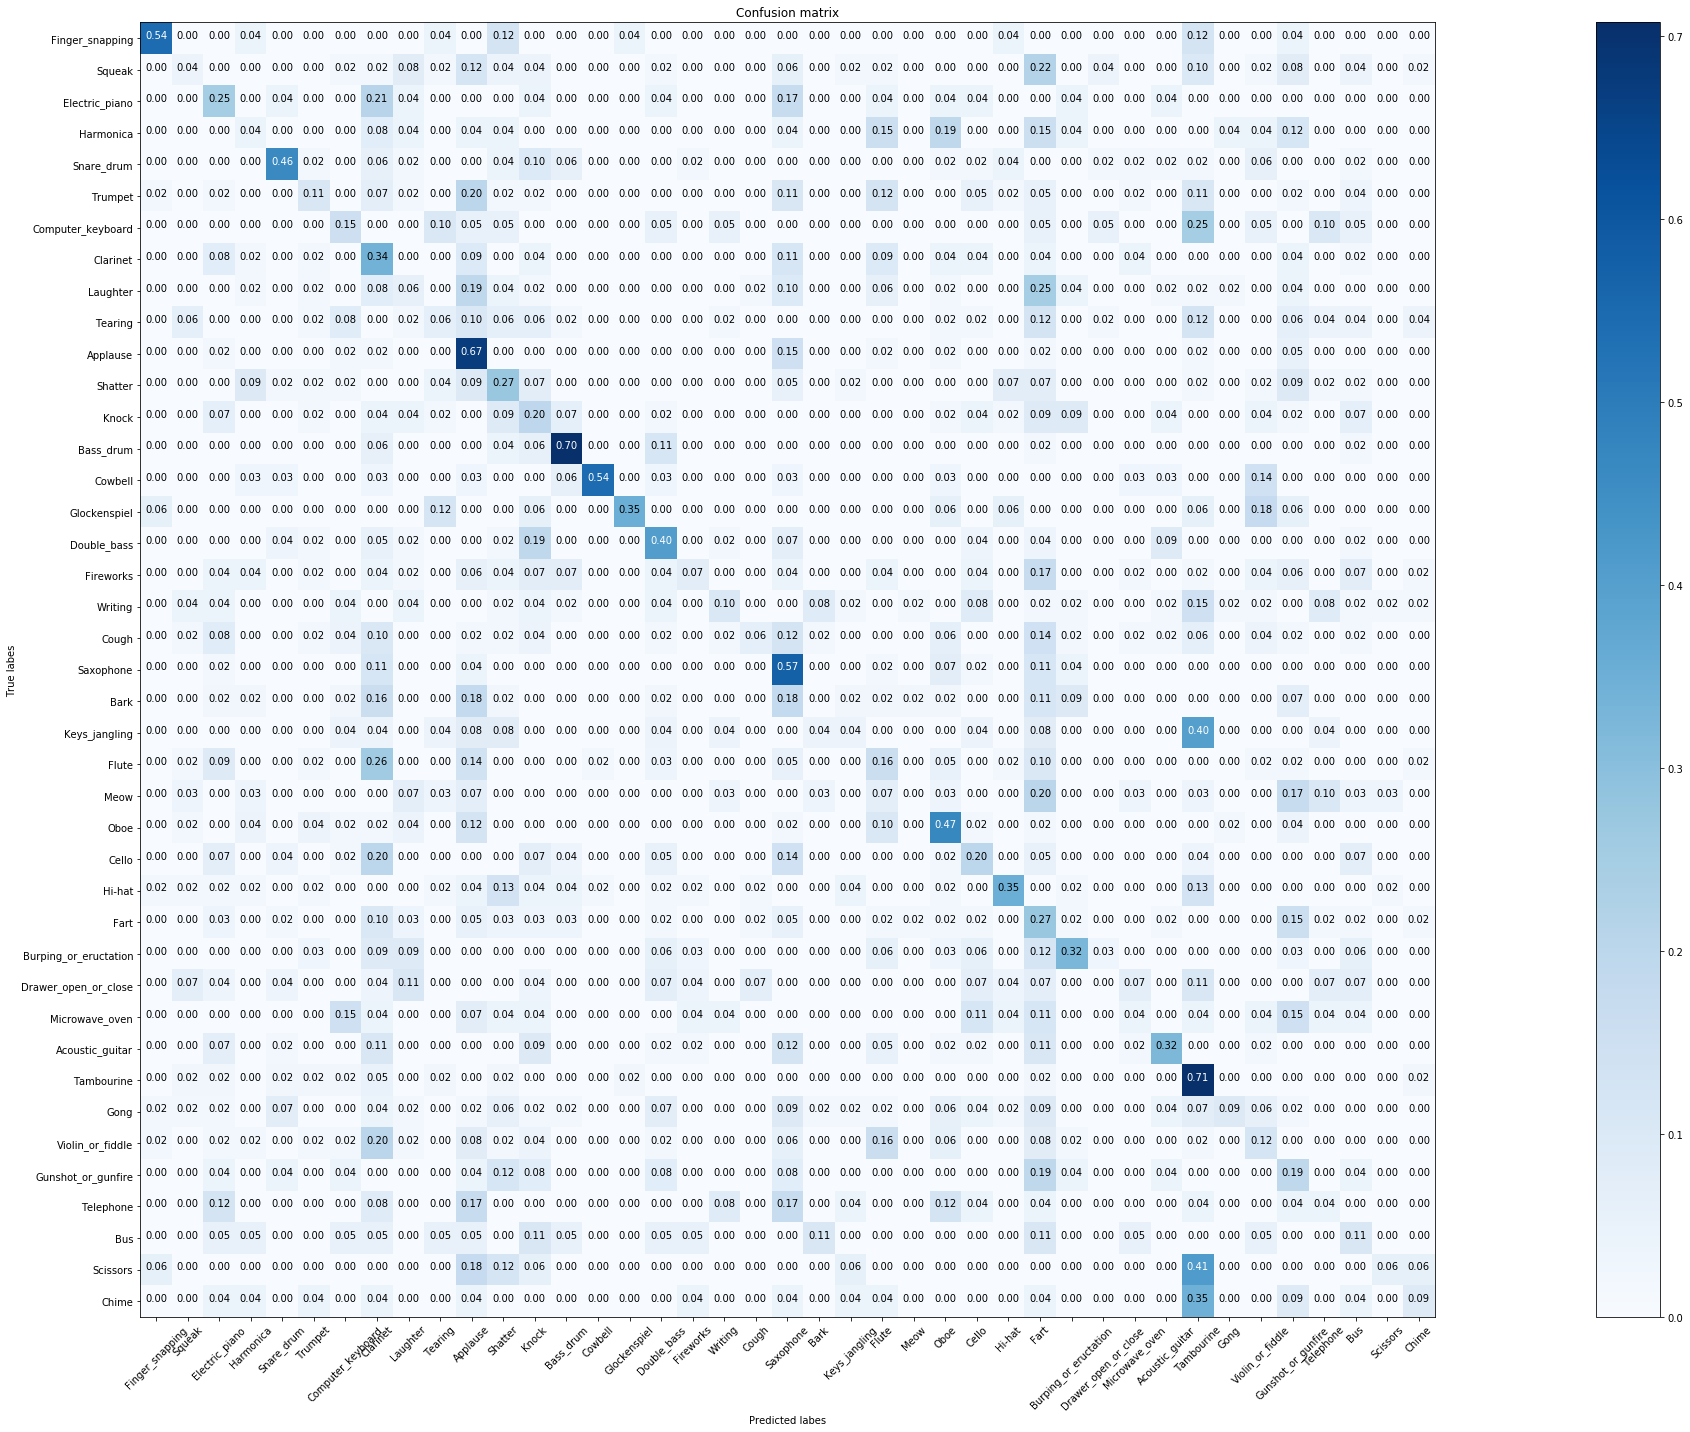

In [0]:
cm = confusion_matrix(label_test, prediction_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
title='Confusion matrix'
print(cm)

plt.figure(figsize=(45,20))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels_list))
plt.xticks(tick_marks, labels_list, rotation=45)
plt.yticks(tick_marks, labels_list)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True labes')
plt.xlabel('Predicted labes')
plt.tight_layout()
plt.show()

##### Построение матрицы путаницы для prediction_train

[[0.85714286 0.         0.         ... 0.         0.         0.        ]
 [0.         0.95833333 0.         ... 0.         0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.97777778 0.         0.        ]
 [0.         0.         0.         ... 0.         0.71794872 0.        ]
 [0.         0.         0.         ... 0.         0.         0.90909091]]


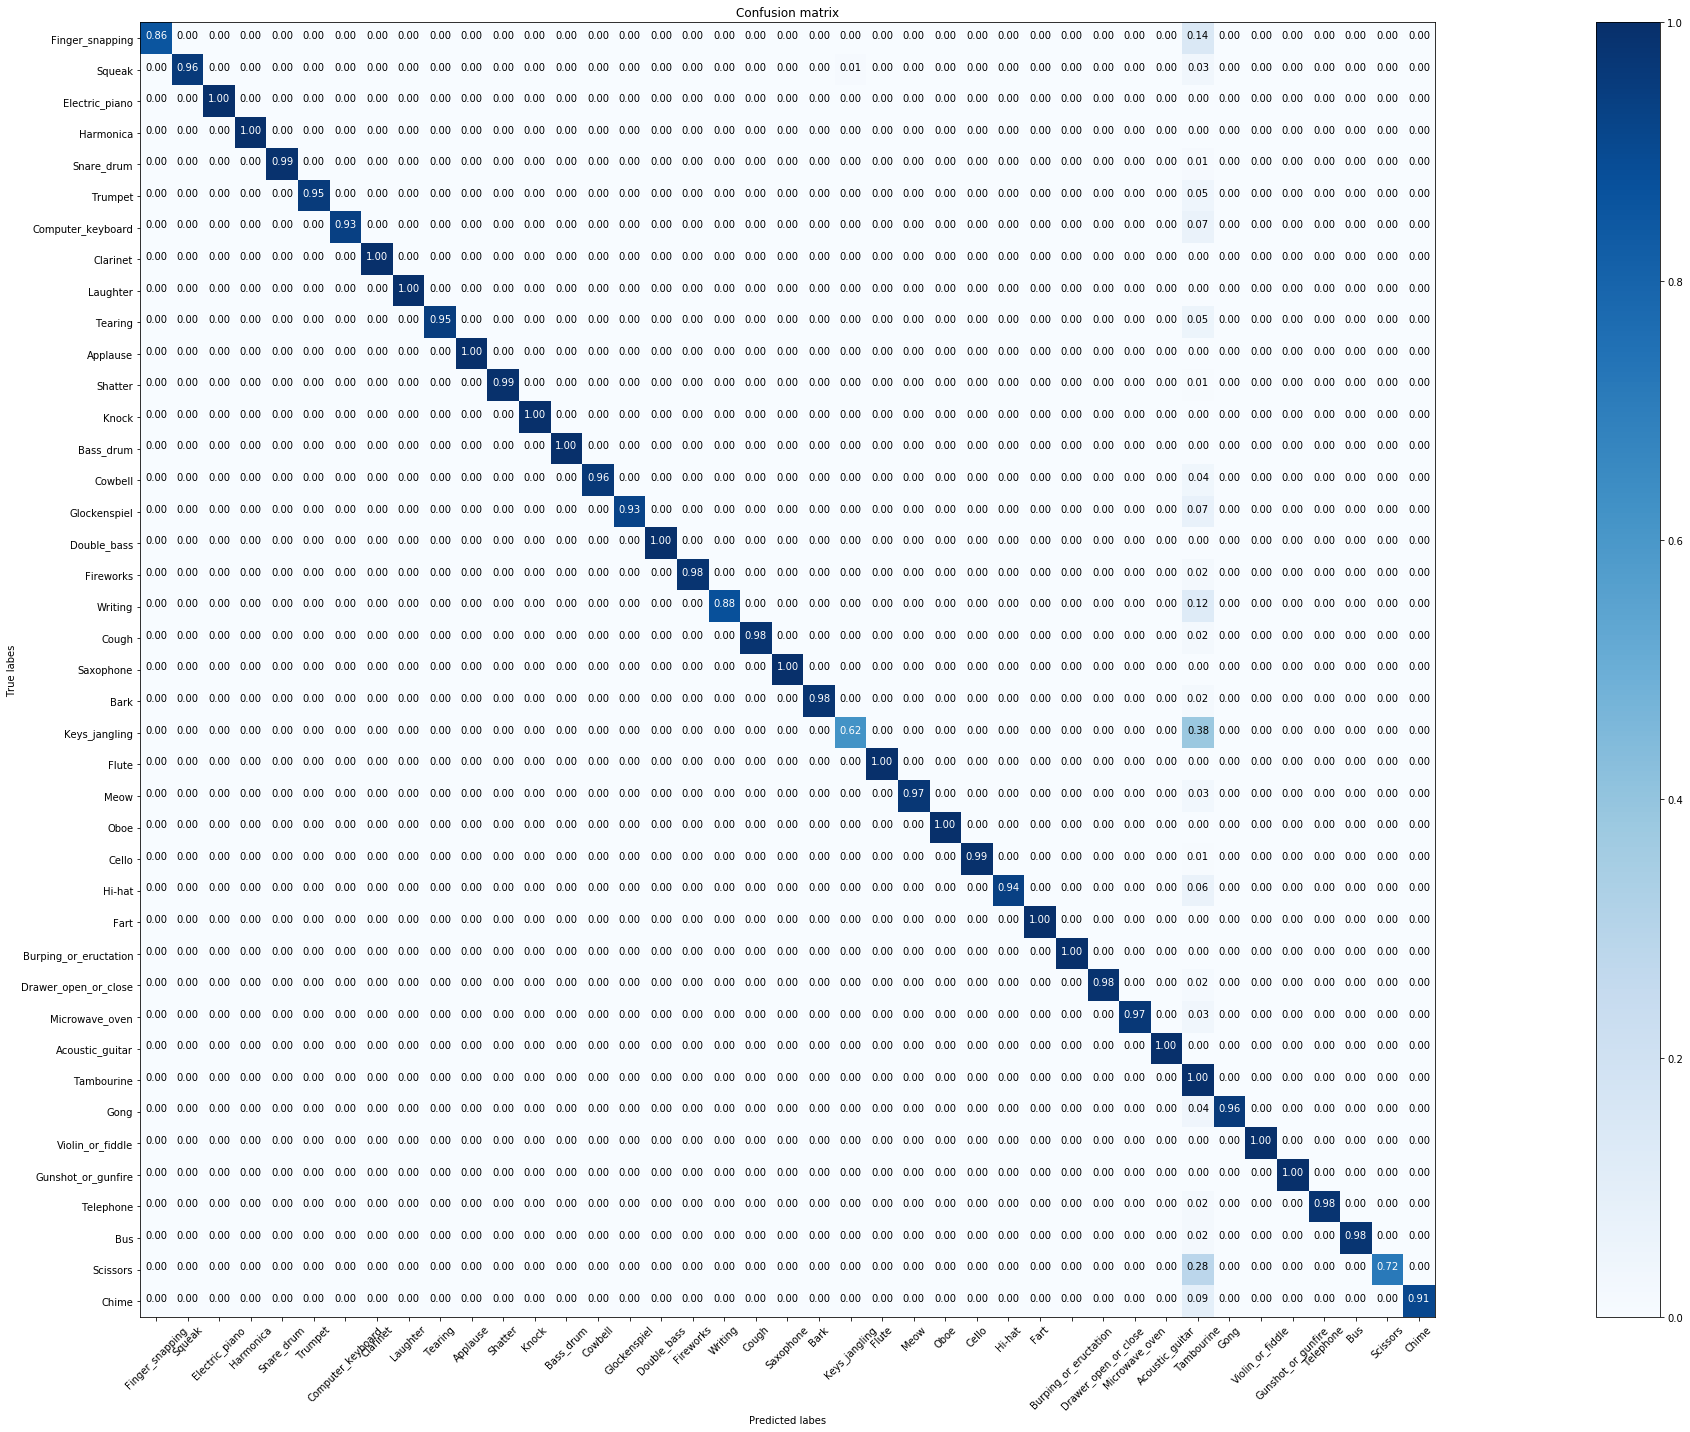

In [0]:
cm = confusion_matrix(label_train, prediction_train)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
title='Confusion matrix'
print(cm)

plt.figure(figsize=(45,20))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels_list))
plt.xticks(tick_marks, labels_list, rotation=45)
plt.yticks(tick_marks, labels_list)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True labes')
plt.xlabel('Predicted labes')
plt.tight_layout()
plt.show()